# Creates a  PDF-based Mutlistep RAG chat-pipeline

In [1]:
import warnings
warnings.filterwarnings("ignore")

## 1. Components

In [16]:
import os
from dotenv import load_dotenv

load_dotenv('../.env')

True

_Using LLAMA_ (for llm & embeddings)

In [17]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
 
tool_models = [model for model in ChatNVIDIA.get_available_models() if model.supports_tools]
tool_models

[Model(id='meta/llama-3.2-3b-instruct', model_type='chat', client='ChatNVIDIA', endpoint=None, aliases=None, supports_tools=True, supports_structured_output=True, base_model=None),
 Model(id='meta/llama-3.1-70b-instruct', model_type='chat', client='ChatNVIDIA', endpoint=None, aliases=None, supports_tools=True, supports_structured_output=True, base_model=None),
 Model(id='nv-mistralai/mistral-nemo-12b-instruct', model_type='chat', client='ChatNVIDIA', endpoint=None, aliases=None, supports_tools=True, supports_structured_output=True, base_model=None),
 Model(id='meta/llama-3.1-405b-instruct', model_type='chat', client='ChatNVIDIA', endpoint=None, aliases=None, supports_tools=True, supports_structured_output=True, base_model=None),
 Model(id='mistralai/mistral-large-2-instruct', model_type='chat', client='ChatNVIDIA', endpoint=None, aliases=None, supports_tools=True, supports_structured_output=True, base_model=None),
 Model(id='meta/llama-3.1-8b-instruct', model_type='chat', client='ChatN

In [18]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

model_id = "meta/llama-3.1-8b-instruct"
llm = ChatNVIDIA(model=model_id)

In [19]:
llm.invoke('what is anime?')

AIMessage(content='Anime is a style of Japanese animation that has become popular worldwide in recent decades. The term "anime" typically refers to Japanese animation that has a distinctive visual style, often including vibrant colors, exaggerated character designs, and dramatic cinematography.\n\nAnime can range from action-adventure series, comedy, romantic dramas, science fiction, and horror, among other genres. The content is often aimed at a specific age group, from children to adults.\n\nSome common characteristics of anime include:\n\n1. **Uniquely designed characters**: Anime often features characters with colorful, detailed, and imaginative designs, which can be more stylized than realistic.\n2. **Vibrant colors and backgrounds**: Anime is known for its rich, bold, and imaginative environments, which can range from realistic to fantastical.\n3. **Architectural and scenic designs**: Anime often features stylized, detailed, and sometimes fantastical environments, such as futuris

In [2]:
from langchain_nvidia_ai_endpoints import NVIDIAEmbeddings

embeddings = NVIDIAEmbeddings(model="NV-Embed-QA")

In [3]:
NVIDIAEmbeddings.get_available_models()

[Model(id='snowflake/arctic-embed-l', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=['ai-arctic-embed-l'], supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='baai/bge-m3', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=None, supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='nvidia/embed-qa-4', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=None, supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='nvidia/llama-3.2-nv-embedqa-1b-v1', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=None, supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='nvidia/nv-embedqa-e5-v5', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=None, supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='nvidia/nv-embed-v1', mod

_Using FAISS_ (for vectorDB)

In [21]:
from langchain_chroma import Chroma

vector_store = Chroma(embedding_function=embeddings)

## 2. Chains

In [22]:
import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from typing_extensions import List, TypedDict

# Load and chunk contents of the blog
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

In [23]:
vector_store.add_documents(documents=all_splits)

['cb0b1c15-4657-4032-a4db-502e194cd0a2',
 '6ec8c194-6748-4a69-8f95-7c13d1869a48',
 '9635d5f7-99ce-451a-adfb-f3e7091f0843',
 '059882c4-dcd1-462b-beb2-3bfd425fe131',
 '8256ea85-368d-4f99-9b6a-20bd66f19ebb',
 '4b4277c1-be4d-4368-a516-3ab2a93dbd8f',
 '8929b5e0-766e-4873-90b5-d735d0673921',
 'e92d126a-c42a-4b2e-88a4-60be3f038f94',
 'a5c6f28d-b7b9-4593-b76b-90ff09827b69',
 '60f0648d-a855-4ce2-a313-b33451157d36',
 '4b796fa3-bf9a-45cf-b256-a148830149b5',
 'd062ac00-b3cd-4eaa-a979-c1e472f70731',
 '190d2d13-f62f-4ab8-ad3f-b2cde31e0006',
 'e4cdba30-703a-463f-bd6c-11c21d6e1183',
 '220b99de-a7c6-4ea5-9451-37393bd69e75',
 '9c017586-93a8-494e-8257-f2066b678f81',
 '4862e940-901e-4173-a8eb-e105521d3d4f',
 'b27b7068-0304-468f-86fd-f2fa713d71a3',
 '600f43be-c6d7-44c6-a2ed-457e35ee9799',
 '7bc13afd-7f0a-4a5e-9928-ac4083dd97b2',
 '4aa5242a-1a73-4c4d-b80b-1c0551c7c149',
 '486d728e-5f07-431e-a532-23f1dc578f27',
 'fa7c0193-c6f0-4d24-9d6d-4e4fa23c3d18',
 '0ed04b7f-5080-4fef-9da6-23950c1d810d',
 '513bb095-f748-

In [24]:
len(all_splits)

66

1. User input as a ```HumanMessage```
2. Vector store query as an ```AIMessage``` with tool calls
3. Retrieved documents as a ```ToolMessage```
4. Final response as a `AIMessage`

_Converting our retrieval step to a TOOL_

In [25]:
from langchain_core.tools import tool
from langgraph.graph import MessagesState, StateGraph


@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to a query."""
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs


In [26]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode


# Step 1: Generate an AIMessage that may include a tool-call to be sent.
def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond."""
    llm_with_tools = llm.bind_tools([retrieve])
    response = llm_with_tools.invoke(state["messages"])
    # MessagesState appends messages to state instead of overwriting
    return {"messages": [response]}


# Step 2: Execute the retrieval.
tools = ToolNode([retrieve])


# Step 3: Generate a response using the retrieved content.
def generate(state: MessagesState):
    """Generate answer."""
    # Get generated ToolMessages
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]

    # Format into prompt
    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message_content = (
        "You are an assistant for question-answering tasks. "
        "Use the following pieces of retrieved context to answer "
        "the question. If you don't know the answer, say that you "
        "don't know. Use three sentences maximum and keep the "
        "answer concise."
        "\n\n"
        f"{docs_content}"
    )
    conversation_messages = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    # Run
    response = llm.invoke(prompt)
    return {"messages": [response]}

In [27]:
#testing tool calls
llm_with_tools = llm.bind_tools([retrieve])
query = "What is task decomposition"

llm_with_tools.invoke(query).tool_calls

[{'name': 'retrieve',
  'args': {'query': 'task decomposition definition'},
  'id': 'chatcmpl-tool-ffa4d11b64984a4b960d066f1c4d8b4f',
  'type': 'tool_call'}]

In [28]:
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(MessagesState)
graph_builder.add_node(query_or_respond)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

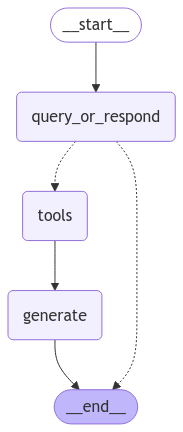

In [29]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
input_message = "Hello"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Hello
================================== Ai Message ==================================

No function call is relevant to this prompt.


In [31]:
input_message = "What is Task Decomposition?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is Task Decomposition?
================================== Ai Message ==================================
Tool Calls:
  retrieve (chatcmpl-tool-1b41ac82c5fc48fbbdc996c3a802648b)
 Call ID: chatcmpl-tool-1b41ac82c5fc48fbbdc996c3a802648b
  Args:
    query: Task Decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller a

In [32]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

# Specify an ID for the thread
config = {"configurable": {"thread_id": "abc123"}}

In [33]:
input_message = "What is Task Decomposition?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is Task Decomposition?
================================== Ai Message ==================================
Tool Calls:
  retrieve (chatcmpl-tool-fda8c8cbfe7e4e44a9fb9fbb108b5eb3)
 Call ID: chatcmpl-tool-fda8c8cbfe7e4e44a9fb9fbb108b5eb3
  Args:
    query: Task Decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller a

In [34]:
input_message = "Can you look up some common ways of doing it?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Can you look up some common ways of doing it?
================================== Ai Message ==================================
Tool Calls:
  retrieve (chatcmpl-tool-4ee1a73a27e24642b548f5ff10f483a1)
 Call ID: chatcmpl-tool-4ee1a73a27e24642b548f5ff10f483a1
  Args:
    query: common task decomposition techniques
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to

## 2. Agents

In [35]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(llm, [retrieve])

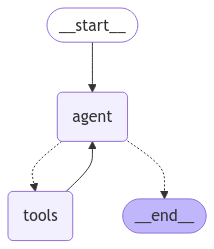

In [36]:
display(Image(agent_executor.get_graph().draw_mermaid_png()))

In [39]:
config = {"configurable": {"thread_id": "def234"}}

input_message = [
    "What is the standard method for Task Decomposition?\n\n"
    "Once you get the answer, look up common extensions of that method."
]

for event in agent_executor.stream(
    {"messages": [{"role": "user", "content": input_message[0]}]},
    stream_mode="values",
    config=config,
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is the standard method for Task Decomposition?

Once you get the answer, look up common extensions of that method.
================================== Ai Message ==================================
Tool Calls:
  retrieve (chatcmpl-tool-8b5e679ecf254dc3a026de571d2801d4)
 Call ID: chatcmpl-tool-8b5e679ecf254dc3a026de571d2801d4
  Args:
    query: standard method for Task Decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is